<a href="https://colab.research.google.com/github/pravallikaP15/Heart-disease_data/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

## Import Libraries

In [47]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [48]:
diabetesData = pd.read_csv("/content/diabetes.csv")
diabetesData.head(10) #several missing values!

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
diabetesData.shape

(768, 9)

In [50]:
diabetesData.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
diabetesData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Lets convert the columns with an 'object' datatype into categorical variables

In [52]:
for feature in diabetesData.columns: # Loop through all columns in the dataframe
    if diabetesData[feature].dtype == 'object': # Only apply for columns with categorical strings
        diabetesData[feature] = pd.Categorical(diabetesData[feature])# Replace strings with an integer
diabetesData.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [53]:
print(diabetesData.Pregnancies.value_counts())
print(diabetesData.Glucose.value_counts())
print(diabetesData.BloodPressure.value_counts())
print(diabetesData.SkinThickness.value_counts())
print(diabetesData.Insulin.value_counts())
print(diabetesData.BMI.value_counts())
print(diabetesData.DiabetesPedigreeFunction.value_counts())
print(diabetesData.Age.value_counts())



Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
2

In [54]:
replaceStruct = {
                "Pregnancies": {"6": 1, "1": 2 ,"8": 3 ,"1":-1},
                "Glucose": {"148": 1, "85":2 , "183": 3, "89": 4,"137": 5},
                 "BloodPressure": {"72": 1, "66":2 , "64": 3, "66": 4,"40": -1},
                 "SkinThickness":     {"35": 1, "29": 2 ,"0": 3 ,"23": 4 ,"35": 5},
                "Insulin":     {"0": 1, "0": 2 },
                "Outcome":     {"1": 0, "0": 1 }
                    }
oneHotCols=["BMI","DiabetesPedigreeFunction","Age"]


In [55]:
diabetesData=diabetesData.replace(replaceStruct)



In [56]:
diabetesData.shape

(768, 9)

In [57]:
diabetesData=pd.get_dummies(diabetesData, columns=oneHotCols)
diabetesData.shape

(768, 823)

In [58]:
diabetesData.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Outcome,BMI_0.0,BMI_18.2,BMI_18.4,BMI_19.1,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Age_72,Age_81
0,6,148,72,35,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,85,66,29,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,183,64,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,89,66,23,94,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,137,40,35,168,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5,116,74,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,78,50,32,88,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,10,115,0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2,197,70,45,543,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,8,125,96,0,0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Columns: 823 entries, Pregnancies to Age_81
dtypes: bool(817), int64(6)
memory usage: 648.9 KB


## Split Data

In [60]:
X = diabetesData.drop("Outcome" , axis=1)
y = diabetesData.pop("Outcome")

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


## Reducing over fitting (Regularization)

In [64]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7560521415270018
0.7662337662337663


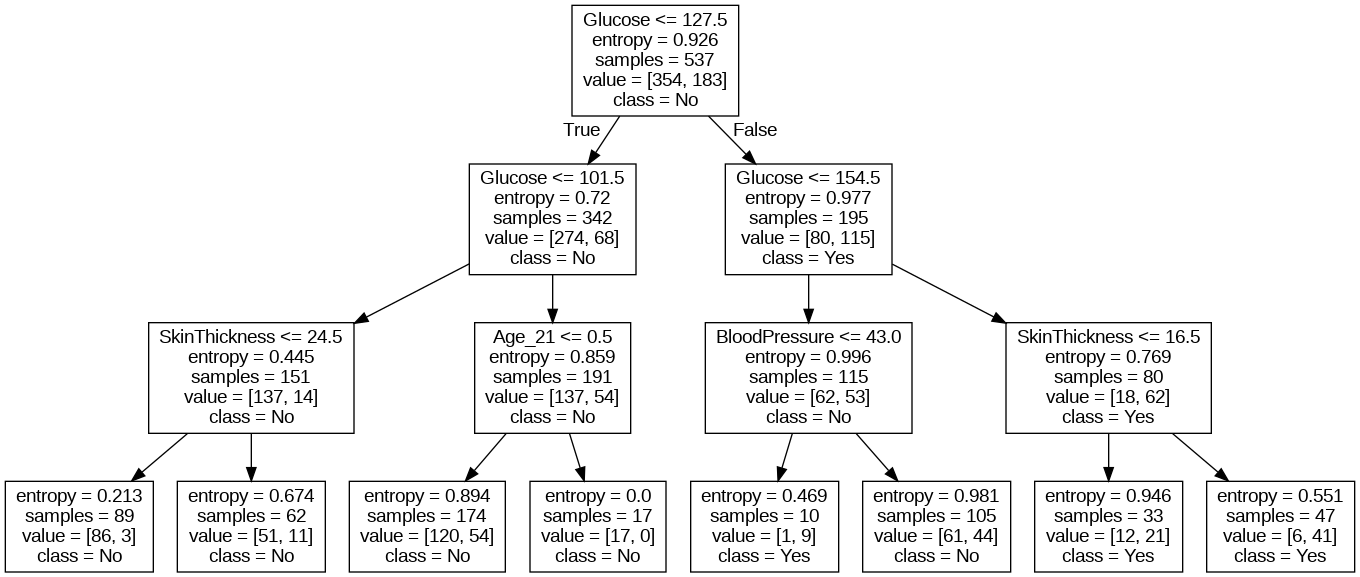

In [65]:
train_char_label = ['No', 'Yes']
diabetesData_Tree_FileR = open('diabetesData_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=diabetesData_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
diabetesData_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng diabetesData_treeR.dot -o diabetesData_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("diabetesData_treeR.png"))



In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                    Imp
Pregnancies    0.000000
Glucose        0.772711
BloodPressure  0.058579
SkinThickness  0.094465
Insulin        0.000000
...                 ...
Age_68         0.000000
Age_69         0.000000
Age_70         0.000000
Age_72         0.000000
Age_81         0.000000

[822 rows x 1 columns]


0.7662337662337663


<Axes: >

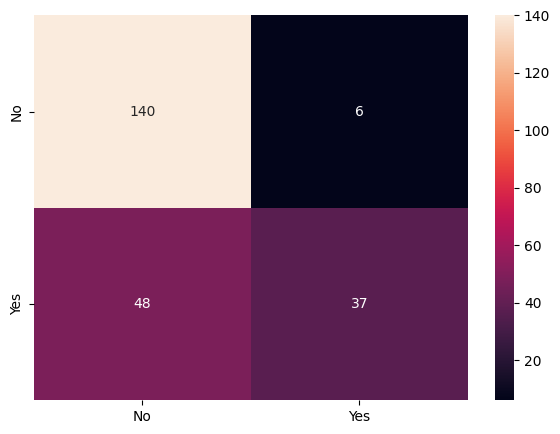

In [67]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


# Ensemble RandomForest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.7619047619047619


<Axes: >

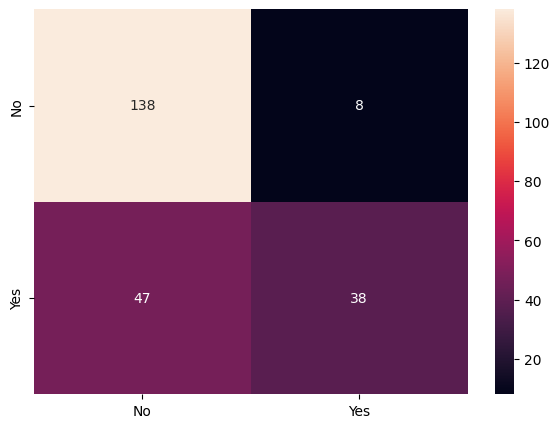

In [69]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')